In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline


[Introduction](introyt1_tutorial.html) ||
**Tensors** ||
[Autograd](autogradyt_tutorial.html) ||
[Building Models](modelsyt_tutorial.html) ||
[TensorBoard Support](tensorboardyt_tutorial.html) ||
[Training Models](trainingyt.html) ||
[Model Understanding](captumyt.html)

# Introduction to PyTorch Tensors

Follow along with the video below or on [youtube](https://www.youtube.com/watch?v=r7QDUPb2dCM)_.

.. raw:: html

   <div style="margin-top:10px; margin-bottom:10px;">
     <iframe width="560" height="315" src="https://www.youtube.com/embed/r7QDUPb2dCM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
   </div>

Tensors are the central data abstraction in PyTorch. This interactive
notebook provides an in-depth introduction to the ``torch.Tensor``
class.

First things first, let’s import the PyTorch module. We’ll also add
Python’s math module to facilitate some of the examples.


In [2]:
import torch
import math

## Creating Tensors

The simplest way to create a tensor is with the ``torch.empty()`` call:




In [3]:
x = torch.empty(3, 4)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[2.3613e-06, 3.0799e-41, 0.0000e+00, 0.0000e+00],
        [       nan, 4.5827e-41, 3.0601e+32, 1.8179e+31],
        [2.7947e+20, 2.2855e+20, 9.3168e-39, 4.5825e-41]])


Let’s unpack what we just did:

-  We created a tensor using one of the numerous factory methods
   attached to the ``torch`` module.
-  The tensor itself is 2-dimensional, having 3 rows and 4 columns.
-  The type of the object returned is ``torch.Tensor``, which is an
   alias for ``torch.FloatTensor``; by default, PyTorch tensors are
   populated with 32-bit floating point numbers. (More on data types
   below.)
-  You will probably see some random-looking values when printing your
   tensor. The ``torch.empty()`` call allocates memory for the tensor,
   but does not initialize it with any values - so what you’re seeing is
   whatever was in memory at the time of allocation.

A brief note about tensors and their number of dimensions, and
terminology:

-  You will sometimes see a 1-dimensional tensor called a
   *vector.* 
-  Likewise, a 2-dimensional tensor is often referred to as a
   *matrix.* 
-  Anything with more than two dimensions is generally just
   called a tensor.

More often than not, you’ll want to initialize your tensor with some
value. Common cases are all zeros, all ones, or random values, and the
``torch`` module provides factory methods for all of these:




tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor(1.0352)


array([ 6.9940907e-01, -1.0182011e+00,  6.9800264e-01, -2.3966072e+00,
       -3.6234194e-01,  6.4414233e-01,  8.8839889e-01, -5.6755334e-01,
        2.0478256e-01, -2.2337414e-02, -9.5411465e-03,  2.0234985e+00,
       -9.6608770e-01,  1.1777142e+00,  1.0527152e+00,  8.6571634e-02,
        1.5013226e+00, -2.7066138e-01,  1.1178957e+00,  1.7193881e-01,
        2.4872255e-01, -3.9468780e-01, -7.7430421e-01, -1.2283365e+00,
        7.0939791e-01, -1.7905146e-02, -4.0205660e-01,  1.9298607e+00,
        7.3295325e-01,  6.8951732e-01, -6.7877364e-01, -8.9125401e-01,
       -1.1665115e+00,  2.2306867e+00,  5.8984190e-01, -1.0871859e+00,
       -2.9396561e-01, -7.8893471e-01, -1.8043405e-01, -5.4380763e-01,
        1.7563395e-01,  7.9959178e-01,  1.9146974e+00, -5.3731149e-01,
       -1.4944490e+00,  5.2396780e-01, -1.4364172e+00, -5.6165737e-01,
       -1.1479061e-01, -2.1859728e-02,  3.4494767e-01,  6.9624162e-01,
       -2.6220185e-01, -7.3243147e-01, -1.5411626e+00,  1.7046231e+00,
      

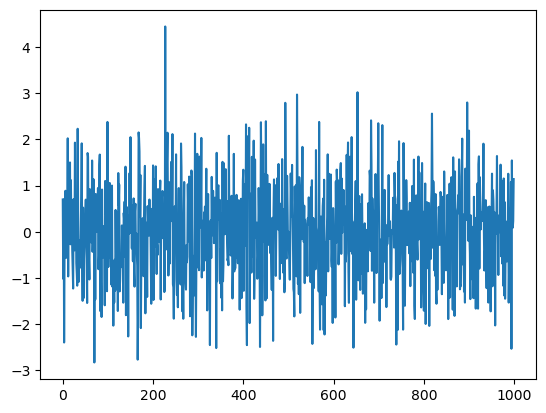

In [4]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

randn = torch.randn(1000)
print(randn.var())
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(randn.numpy())
randn.numpy()

The factory methods all do just what you’d expect - we have a tensor
full of zeros, another full of ones, and another with random values
between 0 and 1.

### Random Tensors and Seeding

Speaking of the random tensor, did you notice the call to
``torch.manual_seed()`` immediately preceding it? Initializing tensors,
such as a model’s learning weights, with random values is common but
there are times - especially in research settings - where you’ll want
some assurance of the reproducibility of your results. Manually setting
your random number generator’s seed is the way to do this. Let’s look
more closely:




In [5]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


What you should see above is that ``random1`` and ``random3`` carry
identical values, as do ``random2`` and ``random4``. Manually setting
the RNG’s seed resets it, so that identical computations depending on
random number should, in most settings, provide identical results.

For more information, see the [PyTorch documentation on
reproducibility](https://pytorch.org/docs/stable/notes/randomness.html)_.

### Tensor Shapes

Often, when you’re performing operations on two or more tensors, they
will need to be of the same *shape* - that is, having the same number of
dimensions and the same number of cells in each dimension. For that, we
have the ``torch.*_like()`` methods:




In [6]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[ 7.4304e-09,  3.0799e-41,  0.0000e+00],
         [ 0.0000e+00, -0.0000e+00,  1.5912e+00]],

        [[ 3.6893e+19,  1.8732e+00, -2.0000e+00],
         [ 1.7064e+00,  1.0842e-19,  1.7735e+00]]])
torch.Size([2, 2, 3])
tensor([[[7.4270e-09, 3.0799e-41, 0.0000e+00],
         [0.0000e+00,        nan, 1.5912e+00]],

        [[1.7753e+28, 4.4339e+27, 1.7975e+19],
         [6.9481e+22, 5.5757e-02, 1.8728e+31]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.6128, 0.1519, 0.0453],
         [0.5035, 0.9978, 0.3884]],

        [[0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]]])


The first new thing in the code cell above is the use of the ``.shape``
property on a tensor. This property contains a list of the extent of
each dimension of a tensor - in our case, ``x`` is a three-dimensional
tensor with shape 2 x 2 x 3.

Below that, we call the ``.empty_like()``, ``.zeros_like()``,
``.ones_like()``, and ``.rand_like()`` methods. Using the ``.shape``
property, we can verify that each of these methods returns a tensor of
identical dimensionality and extent.

The last way to create a tensor that will cover is to specify its data
directly from a PyTorch collection:




In [7]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


Using ``torch.tensor()`` is the most straightforward way to create a
tensor if you already have data in a Python tuple or list. As shown
above, nesting the collections will result in a multi-dimensional
tensor.

<div class="alert alert-info"><h4>Note</h4><p>``torch.tensor()`` creates a copy of the data.</p></div>

### Tensor Data Types

Setting the datatype of a tensor is possible a couple of ways:




In [8]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

# torch.complex64

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 0.9956,  1.4148,  5.8364],
        [11.2406, 11.2083, 11.6692]], dtype=torch.float64)
tensor([[ 0,  1,  5],
        [11, 11, 11]], dtype=torch.int32)


The simplest way to set the underlying data type of a tensor is with an
optional argument at creation time. In the first line of the cell above,
we set ``dtype=torch.int16`` for the tensor ``a``. When we print ``a``,
we can see that it’s full of ``1`` rather than ``1.`` - Python’s subtle
cue that this is an integer type rather than floating point.

Another thing to notice about printing ``a`` is that, unlike when we
left ``dtype`` as the default (32-bit floating point), printing the
tensor also specifies its ``dtype``.

You may have also spotted that we went from specifying the tensor’s
shape as a series of integer arguments, to grouping those arguments in a
tuple. This is not strictly necessary - PyTorch will take a series of
initial, unlabeled integer arguments as a tensor shape - but when adding
the optional arguments, it can make your intent more readable.

The other way to set the datatype is with the ``.to()`` method. In the
cell above, we create a random floating point tensor ``b`` in the usual
way. Following that, we create ``c`` by converting ``b`` to a 32-bit
integer with the ``.to()`` method. Note that ``c`` contains all the same
values as ``b``, but truncated to integers.

Available data types include:

-  ``torch.bool``
-  ``torch.int8``
-  ``torch.uint8``
-  ``torch.int16``
-  ``torch.int32``
-  ``torch.int64``
-  ``torch.half``
-  ``torch.float``
-  ``torch.double``
-  ``torch.bfloat``

## Math & Logic with PyTorch Tensors

Now that you know some of the ways to create a tensor… what can you do
with them?

Let’s look at basic arithmetic first, and how tensors interact with
simple scalars:




In [9]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
# torch.square()
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


As you can see above, arithmetic operations between tensors and scalars,
such as addition, subtraction, multiplication, division, and
exponentiation are distributed over every element of the tensor. Because
the output of such an operation will be a tensor, you can chain them
together with the usual operator precedence rules, as in the line where
we create ``threes``.

Similar operations between two tensors also behave like you’d
intuitively expect:




In [10]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)


tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


It’s important to note here that all of the tensors in the previous code
cell were of identical shape. What happens when we try to perform a
binary operation on tensors if dissimilar shape?

<div class="alert alert-info"><h4>Note</h4><p>The following cell throws a run-time error. This is intentional.</p></div>

::

   a = torch.rand(2, 3)
   b = torch.rand(3, 2)

   print(a * b)




In the general case, you cannot operate on tensors of different shape
this way, even in a case like the cell above, where the tensors have an
identical number of elements.

### In Brief: Tensor Broadcasting

<div class="alert alert-info"><h4>Note</h4><p>If you are familiar with broadcasting semantics in NumPy
     ndarrays, you’ll find the same rules apply here.</p></div>

The exception to the same-shapes rule is *tensor broadcasting.* Here’s
an example:




In [11]:
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.6146, 0.5999, 0.5013, 0.9397],
        [0.8656, 0.5207, 0.6865, 0.3614]])
tensor([[1.2291, 1.1998, 1.0026, 1.8793],
        [1.7312, 1.0413, 1.3730, 0.7228]])


What’s the trick here? How is it we got to multiply a 2x4 tensor by a
1x4 tensor?

Broadcasting is a way to perform an operation between tensors that have
similarities in their shapes. In the example above, the one-row,
four-column tensor is multiplied by *both rows* of the two-row,
four-column tensor.

This is an important operation in Deep Learning. The common example is
multiplying a tensor of learning weights by a *batch* of input tensors,
applying the operation to each instance in the batch separately, and
returning a tensor of identical shape - just like our (2, 4) \* (1, 4)
example above returned a tensor of shape (2, 4).

The rules for broadcasting are:

-  Each tensor must have at least one dimension - no empty tensors.

-  Comparing the dimension sizes of the two tensors, *going from last to
   first:*

   -  Each dimension must be equal, *or*

   -  One of the dimensions must be of size 1, *or*

   -  The dimension does not exist in one of the tensors

Tensors of identical shape, of course, are trivially “broadcastable”, as
you saw earlier.

Here are some examples of situations that honor the above rules and
allow broadcasting:




In [12]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)

tensor([[[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]]])
tensor([[[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]]])
tensor([[[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]]])


Look closely at the values of each tensor above: 

-  The multiplication operation that created ``b`` was 
   broadcast over every “layer” of ``a``.
-  For ``c``, the operation was broadcast over ever layer and row of
   ``a`` - every 3-element column is identical. 
-  For ``d``, we switched it around - now every *row* is identical,
   across layers and columns.

For more information on broadcasting, see the [PyTorch
documentation](https://pytorch.org/docs/stable/notes/broadcasting.html)_
on the topic.

Here are some examples of attempts at broadcasting that will fail:

<div class="alert alert-info"><h4>Note</h4><p>The following cell throws a run-time error. This is intentional.</p></div>

::

   a =     torch.ones(4, 3, 2)

   b = a * torch.rand(4, 3)    # dimensions must match last-to-first

   c = a * torch.rand(   2, 3) # both 3rd & 2nd dims different

   d = a * torch.rand((0, ))   # can't broadcast with an empty tensor




### More Math with Tensors

PyTorch tensors have over three hundred operations that can be performed
on them.

Here is a small sample from some of the major categories of operations:




In [13]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))


Common functions:
tensor([[-0.9238, -0.5724,  0.0791, -0.2629],
        [-0.1986,  0.4439,  0.6434, -0.4776]])
tensor([[0.9238, 0.5724, 0.0791, 0.2629],
        [0.1986, 0.4439, 0.6434, 0.4776]])
tensor([[-0., -0., 1., -0.],
        [-0., 1., 1., -0.]])
tensor([[-1., -1.,  0., -1.],
        [-1.,  0.,  0., -1.]])
tensor([[-0.5000, -0.5000,  0.0791, -0.2629],
        [-0.1986,  0.4439,  0.5000, -0.4776]])


In [14]:

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)



Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])


In [15]:

print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))



Bitwise XOR:
tensor([3, 2, 1])


In [16]:

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool



Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])


In [17]:

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements



Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])


In [18]:

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition


Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.7375, 0.8328],
        [0.8444, 0.2941]])
tensor([[2.2125, 2.4985],
        [2.5332, 0.8822]])
torch.return_types.svd(
U=tensor([[-0.7889, -0.6145],
        [-0.6145,  0.7889]]),
S=tensor([4.1498, 1.0548]),
V=tensor([[-0.7957,  0.6056],
        [-0.6056, -0.7957]]))


This is a small sample of operations. For more details and the full inventory of
math functions, have a look at the
[documentation](https://pytorch.org/docs/stable/torch.html#math-operations)_.

### Altering Tensors in Place

Most binary operations on tensors will return a third, new tensor. When
we say ``c = a * b`` (where ``a`` and ``b`` are tensors), the new tensor
``c`` will occupy a region of memory distinct from the other tensors.

There are times, though, that you may wish to alter a tensor in place -
for example, if you’re doing an element-wise computation where you can
discard intermediate values. For this, most of the math functions have a
version with an appended underscore (``_``) that will alter a tensor in
place.

For example:




In [19]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # this operation creates a new tensor in memory
print(a)              # a has not changed

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note the underscore
print(b)              # b has changed

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])

b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


For arithmetic operations, there are functions that behave similarly:




In [20]:
a = torch.ones(2, 2)
b = torch.rand(2, 2)

print('Before:')
print(a)
print(b)
print('\nAfter adding:')
print(a.add_(b))
print(a)
print(b)
print('\nAfter multiplying')
print(b.mul_(b))
print(b)

Before:
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.3788, 0.4567],
        [0.0649, 0.6677]])

After adding:
tensor([[1.3788, 1.4567],
        [1.0649, 1.6677]])
tensor([[1.3788, 1.4567],
        [1.0649, 1.6677]])
tensor([[0.3788, 0.4567],
        [0.0649, 0.6677]])

After multiplying
tensor([[0.1435, 0.2086],
        [0.0042, 0.4459]])
tensor([[0.1435, 0.2086],
        [0.0042, 0.4459]])


Note that these in-place arithmetic functions are methods on the
``torch.Tensor`` object, not attached to the ``torch`` module like many
other functions (e.g., ``torch.sin()``). As you can see from
``a.add_(b)``, *the calling tensor is the one that gets changed in
place.*

There is another option for placing the result of a computation in an
existing, allocated tensor. Many of the methods and functions we’ve seen
so far - including creation methods! - have an ``out`` argument that
lets you specify a tensor to receive the output. If the ``out`` tensor
is the correct shape and ``dtype``, this can happen without a new memory
allocation:




In [21]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)                # contents of c have changed

assert c is d           # test c & d are same object, not just containing equal values
assert id(c) == old_id  # make sure that our new c is the same object as the old one

torch.rand(2, 2, out=c) # works for creation too!
print(c)                # c has changed again
assert id(c) == old_id  # still the same object!

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.3653, 0.8699],
        [0.2364, 0.3604]])
tensor([[0.0776, 0.4004],
        [0.9877, 0.0352]])


## Copying Tensors

As with any object in Python, assigning a tensor to a variable makes the
variable a *label* of the tensor, and does not copy it. For example:




In [22]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

assert a is b

tensor([[  1., 561.],
        [  1.,   1.]])


But what if you want a separate copy of the data to work on? The
``clone()`` method is there for you:




In [23]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


**There is an important thing to be aware of when using ``clone()``.**
If your source tensor has autograd, enabled then so will the clone.
**This will be covered more deeply in the video on autograd,** but if
you want the light version of the details, continue on.

*In many cases, this will be what you want.* For example, if your model
has multiple computation paths in its ``forward()`` method, and *both*
the original tensor and its clone contribute to the model’s output, then
to enable model learning you want autograd turned on for both tensors.
If your source tensor has autograd enabled (which it generally will if
it’s a set of learning weights or derived from a computation involving
the weights), then you’ll get the result you want.

On the other hand, if you’re doing a computation where *neither* the
original tensor nor its clone need to track gradients, then as long as
the source tensor has autograd turned off, you’re good to go.

*There is a third case,* though: Imagine you’re performing a computation
in your model’s ``forward()`` function, where gradients are turned on
for everything by default, but you want to pull out some values
mid-stream to generate some metrics. In this case, you *don’t* want the
cloned copy of your source tensor to track gradients - performance is
improved with autograd’s history tracking turned off. For this, you can
use the ``.detach()`` method on the source tensor:




In [24]:
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], requires_grad=True)
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], grad_fn=<CloneBackward0>)
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]])
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], requires_grad=True)


What’s happening here?

-  We create ``a`` with ``requires_grad=True`` turned on. **We haven’t
   covered this optional argument yet, but will during the unit on
   autograd.**
-  When we print ``a``, it informs us that the property
   ``requires_grad=True`` - this means that autograd and computation
   history tracking are turned on.
-  We clone ``a`` and label it ``b``. When we print ``b``, we can see
   that it’s tracking its computation history - it has inherited
   ``a``\ ’s autograd settings, and added to the computation history.
-  We clone ``a`` into ``c``, but we call ``detach()`` first.
-  Printing ``c``, we see no computation history, and no
   ``requires_grad=True``.

The ``detach()`` method *detaches the tensor from its computation
history.* It says, “do whatever comes next as if autograd was off.” It
does this *without* changing ``a`` - you can see that when we print
``a`` again at the end, it retains its ``requires_grad=True`` property.

## Moving to GPU

One of the major advantages of PyTorch is its robust acceleration on
CUDA-compatible Nvidia GPUs. (“CUDA” stands for *Compute Unified Device
Architecture*, which is Nvidia’s platform for parallel computing.) So
far, everything we’ve done has been on CPU. How do we move to the faster
hardware?

First, we should check whether a GPU is available, with the
``is_available()`` method.

<div class="alert alert-info"><h4>Note</h4><p>If you do not have a CUDA-compatible GPU and CUDA drivers
     installed, the executable cells in this section will not execute any
     GPU-related code.</p></div>




In [25]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


Once we’ve determined that one or more GPUs is available, we need to put
our data someplace where the GPU can see it. Your CPU does computation
on data in your computer’s RAM. Your GPU has dedicated memory attached
to it. Whenever you want to perform a computation on a device, you must
move *all* the data needed for that computation to memory accessible by
that device. (Colloquially, “moving the data to memory accessible by the
GPU” is shorted to, “moving the data to the GPU”.)

There are multiple ways to get your data onto your target device. You
may do it at creation time:




In [26]:
if torch.cuda.is_available():
    gpu_rand = torch.rand(2, 2, device='cuda')
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


By default, new tensors are created on the CPU, so we have to specify
when we want to create our tensor on the GPU with the optional
``device`` argument. You can see when we print the new tensor, PyTorch
informs us which device it’s on (if it’s not on CPU).

You can query the number of GPUs with ``torch.cuda.device_count()``. If
you have more than one GPU, you can specify them by index:
``device='cuda:0'``, ``device='cuda:1'``, etc.

As a coding practice, specifying our devices everywhere with string
constants is pretty fragile. In an ideal world, your code would perform
robustly whether you’re on CPU or GPU hardware. You can do this by
creating a device handle that can be passed to your tensors instead of a
string:




In [27]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cpu
tensor([[0.6923, 0.7545],
        [0.7746, 0.2330]])


If you have an existing tensor living on one device, you can move it to
another with the ``to()`` method. The following line of code creates a
tensor on CPU, and moves it to whichever device handle you acquired in
the previous cell.




In [28]:
y = torch.rand(2, 2)
y = y.to(my_device)

It is important to know that in order to do computation involving two or
more tensors, *all of the tensors must be on the same device*. The
following code will throw a runtime error, regardless of whether you
have a GPU device available:

::

   x = torch.rand(2, 2)
   y = torch.rand(2, 2, device='gpu')
   z = x + y  # exception will be thrown




## Manipulating Tensor Shapes

Sometimes, you’ll need to change the shape of your tensor. Below, we’ll
look at a few common cases, and how to handle them.

### Changing the Number of Dimensions

One case where you might need to change the number of dimensions is
passing a single instance of input to your model. PyTorch models
generally expect *batches* of input.

For example, imagine having a model that works on 3 x 226 x 226 images -
a 226-pixel square with 3 color channels. When you load and transform
it, you’ll get a tensor of shape ``(3, 226, 226)``. Your model, though,
is expecting input of shape ``(N, 3, 226, 226)``, where ``N`` is the
number of images in the batch. So how do you make a batch of one?




In [29]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


The ``unsqueeze()`` method adds a dimension of extent 1.
``unsqueeze(0)`` adds it as a new zeroth dimension - now you have a
batch of one!

So if that’s *un*\ squeezing? What do we mean by squeezing? We’re taking
advantage of the fact that any dimension of extent 1 *does not* change
the number of elements in the tensor.




In [30]:
c = torch.rand(1, 1, 1, 1, 1)
print(c)

tensor([[[[[0.1506]]]]])


Continuing the example above, let’s say the model’s output is a
20-element vector for each input. You would then expect the output to
have shape ``(N, 20)``, where ``N`` is the number of instances in the
input batch. That means that for our single-input batch, we’ll get an
output of shape ``(1, 20)``.

What if you want to do some *non-batched* computation with that output -
something that’s just expecting a 20-element vector?




In [31]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

torch.Size([1, 20])
tensor([[0.9585, 0.7756, 0.8973, 0.4929, 0.2367, 0.8194, 0.4509, 0.2690, 0.8381,
         0.8207, 0.6818, 0.5057, 0.9335, 0.9769, 0.2792, 0.3277, 0.5210, 0.7349,
         0.7823, 0.8637]])
torch.Size([20])
tensor([0.9585, 0.7756, 0.8973, 0.4929, 0.2367, 0.8194, 0.4509, 0.2690, 0.8381,
        0.8207, 0.6818, 0.5057, 0.9335, 0.9769, 0.2792, 0.3277, 0.5210, 0.7349,
        0.7823, 0.8637])
torch.Size([2, 2])
torch.Size([2, 2])


You can see from the shapes that our 2-dimensional tensor is now
1-dimensional, and if you look closely at the output of the cell above
you’ll see that printing ``a`` shows an “extra” set of square brackets
``[]`` due to having an extra dimension.

You may only ``squeeze()`` dimensions of extent 1. See above where we
try to squeeze a dimension of size 2 in ``c``, and get back the same
shape we started with. Calls to ``squeeze()`` and ``unsqueeze()`` can
only act on dimensions of extent 1 because to do otherwise would change
the number of elements in the tensor.

Another place you might use ``unsqueeze()`` is to ease broadcasting.
Recall the example above where we had the following code:

::

   a =     torch.ones(4, 3, 2)

   c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
   print(c)

The net effect of that was to broadcast the operation over dimensions 0
and 2, causing the random, 3 x 1 tensor to be multiplied element-wise by
every 3-element column in ``a``.

What if the random vector had just been 3-element vector? We’d lose the
ability to do the broadcast, because the final dimensions would not
match up according to the broadcasting rules. ``unsqueeze()`` comes to
the rescue:




In [32]:
a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)             # broadcasting works again!

torch.Size([3, 1])
tensor([[[0.4887, 0.4887],
         [0.8625, 0.8625],
         [0.6191, 0.6191]],

        [[0.4887, 0.4887],
         [0.8625, 0.8625],
         [0.6191, 0.6191]],

        [[0.4887, 0.4887],
         [0.8625, 0.8625],
         [0.6191, 0.6191]],

        [[0.4887, 0.4887],
         [0.8625, 0.8625],
         [0.6191, 0.6191]]])


The ``squeeze()`` and ``unsqueeze()`` methods also have in-place
versions, ``squeeze_()`` and ``unsqueeze_()``:




In [33]:
batch_me = torch.rand(3, 226, 226)
print(batch_me.shape)
batch_me.unsqueeze_(0)
print(batch_me.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


Sometimes you’ll want to change the shape of a tensor more radically,
while still preserving the number of elements and their contents. One
case where this happens is at the interface between a convolutional
layer of a model and a linear layer of the model - this is common in
image classification models. A convolution kernel will yield an output
tensor of shape *features x width x height,* but the following linear
layer expects a 1-dimensional input. ``reshape()`` will do this for you,
provided that the dimensions you request yield the same number of
elements as the input tensor has:




In [52]:
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

torch.Size([6, 20, 20])
torch.Size([2400])
torch.Size([2400])


<div class="alert alert-info"><h4>Note</h4><p>The ``(6 * 20 * 20,)`` argument in the final line of the cell
     above is because PyTorch expects a **tuple** when specifying a
     tensor shape - but when the shape is the first argument of a method, it
     lets us cheat and just use a series of integers. Here, we had to add the
     parentheses and comma to convince the method that this is really a
     one-element tuple.</p></div>

When it can, ``reshape()`` will return a *view* on the tensor to be
changed - that is, a separate tensor object looking at the same
underlying region of memory. *This is important:* That means any change
made to the source tensor will be reflected in the view on that tensor,
unless you ``clone()`` it.

There *are* conditions, beyond the scope of this introduction, where
``reshape()`` has to return a tensor carrying a copy of the data. For
more information, see the
[docs](https://pytorch.org/docs/stable/torch.html#torch.reshape)_.




## NumPy Bridge

In the section above on broadcasting, it was mentioned that PyTorch’s
broadcast semantics are compatible with NumPy’s - but the kinship
between PyTorch and NumPy goes even deeper than that.

If you have existing ML or scientific code with data stored in NumPy
ndarrays, you may wish to express that same data as PyTorch tensors,
whether to take advantage of PyTorch’s GPU acceleration, or its
efficient abstractions for building ML models. It’s easy to switch
between ndarrays and PyTorch tensors:




In [34]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


PyTorch creates a tensor of the same shape and containing the same data
as the NumPy array, going so far as to keep NumPy’s default 64-bit float
data type.

The conversion can just as easily go the other way:




In [35]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.4239, 0.0164, 0.5220],
        [0.5693, 0.6086, 0.5455]])
[[0.4239024  0.0163914  0.52199143]
 [0.56934655 0.60863465 0.54549646]]


It is important to know that these converted objects are using *the same
underlying memory* as their source objects, meaning that changes to one
are reflected in the other:




In [36]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[4.2390239e-01 1.6391397e-02 5.2199143e-01]
 [5.6934655e-01 1.7000000e+01 5.4549646e-01]]
